# Transport Layer

In previous classes, we discussed the network interface and intenet layers. See the image below for the layers of a typical intenet network.

Recall, the network interface layer is comprised of the physical layer (cables, devices, wrireless frequencies) used to transmit bits from one device to another that share a common medium (cable, over the air). Each device has a low-level MAC address that identifies it in the network (e.g. f4:d1:08:85:2e:b0).

The internet layer is responsible with trasmitting data packets from source to destination. A packet has a maximum size of 65,535 bytes. The network layer **does not** provide any delivery guarantees. It is similar to the first-class mail, or the cell-phone text messaging. Most of the times the messages arrive at the destination, but sometimes they do not, and sometimes the package is open and content is missing or damaged.

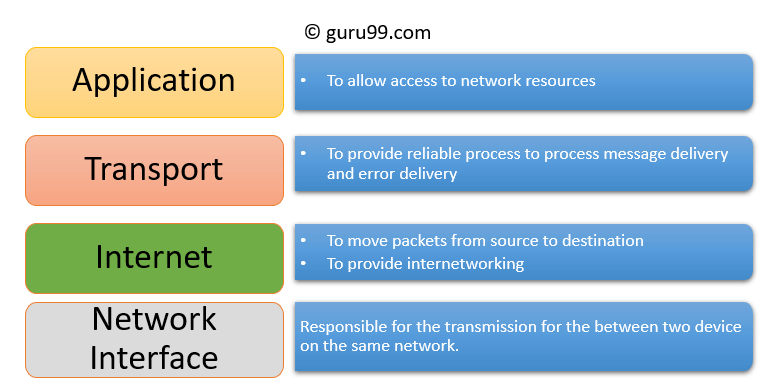

## The Transport Layer

The role of the **transport layer** is to provide efficient and reliable data transmission service to the applications running on a device. 

The transport layer uses the internet layer to transmit packets from source to destination including
1. At the source 
    1. Split the data into packets 
    2. Send packets to the destination.
    3. Resend packets that were lost or damaged.
2. At the destination
    1. Reassemble the packages in the correct order, even though they were received out of order
    2. Detect if a packet is missing and ask for retransmission.


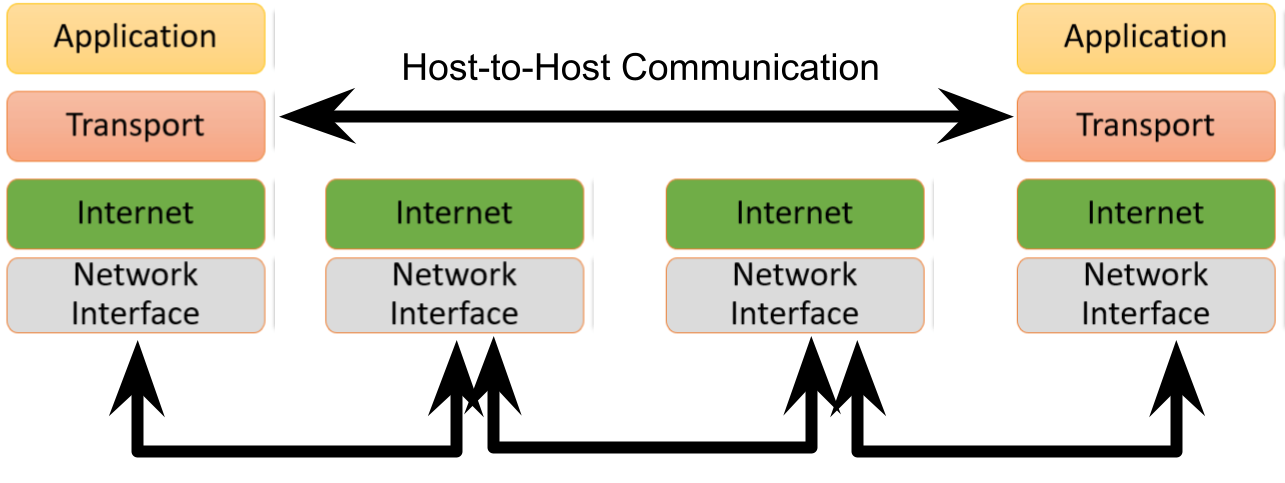

### Activity

1. Mrs. Evans wants to send 10 cards with geometry problems for the next class to Mr. McCrory over a network of studious, but sometimes unrealiable students.

2. Mrs. Evans first makes a connection request to Mr McCrory following the steps shown in the picture below.
    1. Mrs. Evans sends an index card with the following content *CR(seq=57)*
    1. Mr. McCrory sends back an index card with the content *ACK(seq=23, ACK=57)*
    1. Mrs. Evans sends problem 1 with the content *DATA(seq=57,ACK=23)*
    1. To speed up the process, Mrs. Evans keeps a window of three unacknowledged data packets. She sends problem 2 with the content *DATA(seq=58,ACK=23)*
    1. Mrs Evans sends problem 3 with the content *DATA(seq=59,ACK=23)*
    
3. Mr. Mc Crory receives the card with problem 2 and sends an index card back with the content *DATA(seq=23, ACK=58)*

3. Mr. Mc Crory receives the card with problem 1 and sends an index card back with the content *DATA(seq=24, ACK=57)*

3. Mrs. Evans receives the ack of for problem 2. 

3. Mrs. Evans receives the ack of for problem 1. Now Mrs. Evans knows that Mr. McCrory received problems 1 and 2 and may send two more problems.

The activity continues using the following rules:
1. Students can decide to drop a card (never deliver it) at most once per activity.
1. Students can decide to delay the delivery of a card (no more that 10 seconds).
1. Two students are to record the packets sent through the network.
1. Two students mainatain the sequence numbers for sender and receiver.
1. Two students maintain the acknowledgments received by the sender and receiver.


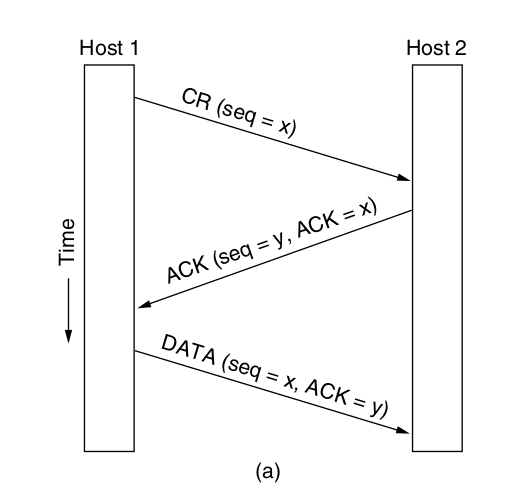

**What can go wrong?**

Mrs. Evans get nervous her connection request was lost and sends a copy.

An enterprising student wants to establish their own connection to Mr. McCrory pretending to be Mrs. Evans.

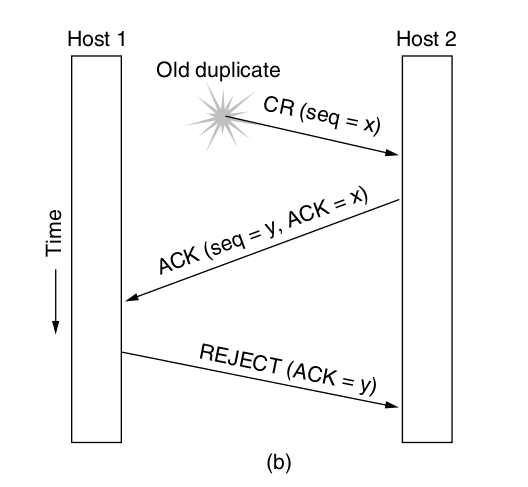

Data packets may be lost or duplicated.

## Conclusion 

Today, we learned the following:
1. The transport layer function
2. A set of rules, called protocol, two hosts can establish a connection.
3. A sliding window protocol for sending data packets from source to destination.

Next time, we will
1. Practice the two protocols we learned today.
1. Learn a protocol for closing a connection.